# FIFA (lineplot)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import numpy as np

pd.plotting.register_matplotlib_converters()
%matplotlib inline
plt.style.use('ggplot')
if not os.path.exists('data/fifa.csv'):
    os.symlink('data/data-for-vis/fifa.csv','data/fifa.csv') # creates symbolic link, pointing to first argument
print("Setup")

`pd.plotting.register_matplotlib_converters()` <br>
This function modifies the global matplotlib.units.registry dictionary. pandas adds custom converters for:
- pd.Timestamp
- pd.Period
- np.datetime64
- datetime.datetime
- datetime.date
- datetime.time

`%matplotlib inline` <br>
Provided you are running IPython, the %matplotlib inline will make your plot outputs appear and be stored within the notebook. "Magic function". Weird coz I've never used it before and it worked fine all the time.

In [ ]:
fifa_path = "data/fifa.csv"
fifa_data = pd.read_csv(fifa_path, index_col="Date", parse_dates=True)
fifa_data

In [ ]:
plt.figure(figsize=(16,6))
sns.lineplot(data=fifa_data)

# SPOTIFY (lineplot)

In [ ]:
spotify_path = 'data/spotify.csv'
spotify_data = pd.read_csv(spotify_path, index_col='Date', parse_dates=True)
spotify_data
# sd.head() # sd.tail()

In [ ]:
plt.figure(figsize=(14,6))
plt.title("Daily global streams of popular songs in 2017-2018")
sns.lineplot(data=spotify_data)

In [ ]:
#list(spotify_data.columns)
plt.figure(figsize=(14,6))
plt.title("2 song comparison")
sns.lineplot(data=spotify_data['HUMBLE.'], label="HUMBLE.")
sns.lineplot(data=spotify_data['Despacito'], label="Irrelevant trash song")
plt.xlabel("Date")
plt.ylabel("")
plt.show()

# MUSEUM (lineplot)

In [ ]:
museum_path = 'data/museum_visitors.csv'
museum_data = pd.read_csv(museum_path, index_col='Date', parse_dates=True)
museum_data.tail()

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=museum_data)

In [ ]:
ca_museum_jul18 = museum_data['Chinese American Museum'] #.value_counts()
# first date - 01.01.2014
# we want 01.07.2018
# month diff = 12*4 + 7 = 55
# index = 55-1=54
ca_museum_jul18[54]

In [ ]:
ca_museum_jul18.index[0].date()

# FLIGHTS (barplot, heatmap)

In [ ]:
flight_path = 'data/flight_delays.csv'
flight_data = pd.read_csv(flight_path, index_col='Month')
flight_data

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Average Arrival Delay for Spirit Airlines Flights, by Month")
sns.barplot(x=flight_data.index, y=flight_data['NK'])
plt.ylabel("Arrival delay (in minutes)")

In [ ]:
plt.figure(figsize=(14,7))
plt.title("Average Arrival Delay for Each Airline, by Month")
sns.heatmap(data=flight_data, annot=True)
plt.xlabel("Airline")

# IGN_GAME (barplot, heatmap)

`iloc` function has access to specified row of data frame.

In [ ]:
ign_path = 'data/ign_scores.csv'
ign_data = pd.read_csv(ign_path, index_col='Platform')
ign_data

In [ ]:
ign_data_t = ign_data.transpose()
pd.set_option("display.max_columns", None)
ign_data_t

In [ ]:
plt.figure(figsize=(18,8))
sns.barplot(data=ign_data)

In [ ]:
plt.figure(figsize=(20,12))
sns.barplot(data=ign_data_t, orient='h')
#sns.barplot(x=ign_data_t, y=ign_data_t.index)

In [ ]:
worst = 1000000
best = -1
worst_genre = ''
best_genre = ''

for i in range(len(ign_data_t)):
    curr_score = sum(ign_data_t.iloc[i]) / len(ign_data_t.iloc[i])
    if curr_score < worst:
        worst = curr_score
        worst_genre = ign_data_t.index[i]
    if curr_score > best:
        best = curr_score
        best_genre = ign_data_t.index[i]

print('Best genre: {}, score: {}\nWorst genre: {}, score: {}'.format(best_genre,best,worst_genre, worst))

In [ ]:
worst = 1000000
best = -1
worst_platform = ''
best_platform = ''

for i in range(len(ign_data)):
    curr_score = sum(ign_data.iloc[i]) / len(ign_data.iloc[i])
    if curr_score < worst:
        worst = curr_score
        worst_platform = ign_data.index[i]
    if curr_score > best:
        best = curr_score
        best_platform = ign_data.index[i]

print('Best platform: {}, score: {}\nWorst platform: {}, score: {}'.format(best_platform,best,worst_platform, worst))

In [ ]:
# Avg score for pc
indx = list(ign_data.index).index("PC")
score = sum(ign_data.iloc[indx]) / len(ign_data.iloc[indx])
print(score)

# Highest score for PC
score = max(ign_data.iloc[indx])
print(score)

In [ ]:
# Average for racing games
plt.figure(figsize=(8,6))
sns.barplot(x=ign_data['Racing'],y=ign_data.index)
plt.title("Average Score for Racing Games by Platform")

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(data=ign_data, annot=True, cmap='RdYlGn')

# INSURANCE (scatterplot)

In [ ]:
insurance_path = 'data/insurance.csv'
insurance_data = pd.read_csv(insurance_path)
insurance_data.head()

In [ ]:
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'])

In [ ]:
sns.regplot(x=insurance_data['bmi'], y=insurance_data['charges'])

In [ ]:
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'], hue=insurance_data['smoker'])

In [ ]:
sns.lmplot(x='bmi', y='charges', hue='smoker', data=insurance_data)

In [ ]:
sns.swarmplot(x=insurance_data['smoker'], y=insurance_data['charges'], s=2) 
# s-> changing size of markers

# CANDY (scatterplot)

In [ ]:
candy_path = 'data/candy.csv'
candy_data = pd.read_csv(candy_path, index_col='id')
candy_data

In [ ]:
# The most sugar
i = candy_data['sugarpercent'].idxmax()
print("The most sugar level: {}, competition name: {}".format(candy_data.sugarpercent[i], candy_data['competitorname'][i]))

In [ ]:
sns.scatterplot(x=candy_data['sugarpercent'],y=candy_data['winpercent'])

In [ ]:
sns.regplot(x=candy_data['sugarpercent'],y=candy_data['winpercent'])

In [ ]:
sns.scatterplot(x=candy_data['pricepercent'], y=candy_data['winpercent'], hue=candy_data['chocolate'])

In [ ]:
sns.lmplot(x='pricepercent', y='winpercent', hue='chocolate', data=candy_data)

In [ ]:
sns.swarmplot(x=candy_data['chocolate'],y=candy_data['winpercent'])
# better plot than the one above.

# IRIS (histogram, kde)

In [ ]:
iris_path = 'data/iris.csv'
iris_data = pd.read_csv(iris_path, index_col="Id")
iris_data

In [ ]:
sns.histplot(iris_data['Petal Length (cm)'])

In [ ]:
sns.kdeplot(data=iris_data['Petal Length (cm)'], shade=True)

In [ ]:
sns.jointplot(x=iris_data['Petal Length (cm)'], y=iris_data['Sepal Width (cm)'], kind='kde')

In [ ]:
sns.kdeplot(data=iris_data, x='Petal Length (cm)', hue="Species", shade=True)
plt.title("Distribution of Petal Lengths, by Species")
print(end="")

# CANCER (histogram, kde)

In [ ]:
cancer_path = 'data/cancer.csv'
cancer_data = pd.read_csv(cancer_path, index_col='Id')
cancer_data

In [ ]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(cancer_data)
#profile

In [ ]:
# largest value for Perimeter (mean)
m = max(cancer_data['Perimeter (mean)'])
i = list(cancer_data['Perimeter (mean)']).index(m)
# i = cancer_data['Perimeter (mean)'].idxmax()
print("Largest perimeter (mean): {}, Id: {}".format(m,cancer_data.index[i]))

In [ ]:
#sns.histplot(cancer_data['Area (mean)'], hue=cancer_data['Diagnosis'])
cancer_m = cancer_data[cancer_data.Diagnosis == 'M']
cancer_b = cancer_data[cancer_data.Diagnosis == "B"]

sns.histplot(cancer_b['Area (mean)'], label='Benign', color='g')
sns.histplot(cancer_m['Area (mean)'], label='Malicious', color='r')

plt.legend()

In [ ]:
sns.histplot(data=cancer_data, x='Area (mean)', hue='Diagnosis')

In [ ]:
sns.kdeplot(data=cancer_b['Radius (worst)'], shade=True, label='Benign', color='g')
sns.kdeplot(data=cancer_m['Radius (worst)'], shade=True, label='Malicious', color='r')
plt.legend()

In [ ]:
sns.kdeplot(data=cancer_data, x='Area (mean)', hue='Diagnosis', shade=True)

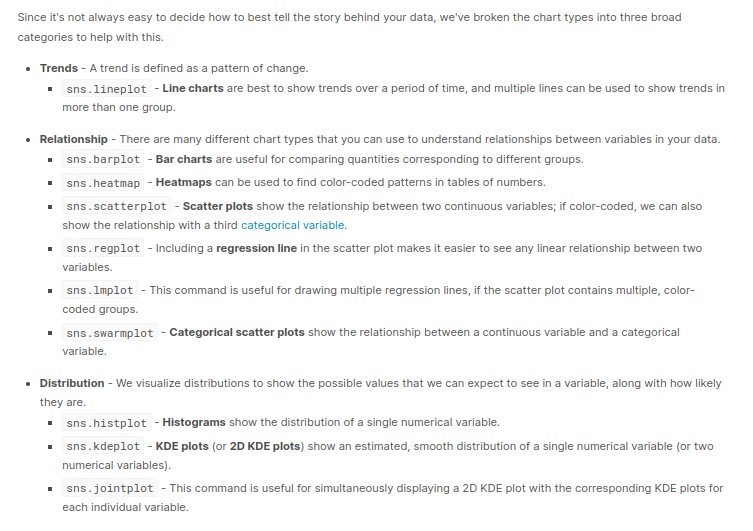

### Seaborn styles:
- `darkgrid`
- `whitegrid`
- `dark`
- `white`
- `ticks` 
<br> <br> To change style: `sns.set_style('stylename')`

# IRIS (pie chart)

In [ ]:
setosa = len(iris_data.loc[iris_data.Species == 'Iris-setosa'])
versi = len(iris_data.loc[iris_data.Species == 'Iris-versicolor'])
virgin = len(iris_data.loc[iris_data.Species == 'Iris-virginica'])

y = np.array([setosa, versi, virgin])
lbls = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

plt.figure(figsize=(7,7))
plt.pie(y, labels = lbls)
plt.legend()
plt.show()

# IRIS (catplot)

In [ ]:
sns.catplot(x='Species', y='Petal Length (cm)', data=iris_data)

In [ ]:
iris_data['petal_length_bins'] = pd.cut(iris_data['Petal Length (cm)'], bins=3, labels=('short','medium','long'))
sns.catplot(x='petal_length_bins', y='Petal Length (cm)', hue='Species', data=iris_data)
# size - similar to hue but specify size of markers 

In [ ]:
sns.catplot(x='Species', kind='count', data=iris_data)

In [ ]:
sns.catplot(x='Species', y='Petal Width (cm)', data=iris_data, kind='box', sym='')
# sym='' - not showing outliers

# IRIS (relplot)

In [ ]:
sns.relplot(x='Petal Width (cm)', y='Petal Length (cm)', hue='Species', data=iris_data, kind='line', ci='sd')
# ci - confidence intervals